#### Goal:
### Analyze the Student Exam Score dataset to explore how factors like gender, parental education level, lunch type, and test preparation affect students' math, reading, and writing scores using Pandas, NumPy, Matplotlib, and Seaborn.

## Why This Project?

Learn data cleaning and preprocessing using Pandas.

Practice NumPy for basic statistics like mean, median, and standard deviation.

Visualize performance trends with Matplotlib and Seaborn (e.g., score comparisons by gender or prep course).

Understand educational patterns and how background factors influence academic performance.

Build skills for real-world data analysis in the education domain.

## 2.Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## 3.Load Dataset

In [3]:
# Load dataset
df = pd.read_csv('student_exam_scores.csv')

# Display first 5 rows
df.head()

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3


## 4.Explore Data

In [4]:
print("Shape:", df.shape)
print(df.info())
print(df.isnull().sum())
print(df.describe())

Shape: (200, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          200 non-null    object 
 1   hours_studied       200 non-null    float64
 2   sleep_hours         200 non-null    float64
 3   attendance_percent  200 non-null    float64
 4   previous_scores     200 non-null    int64  
 5   exam_score          200 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB
None
student_id            0
hours_studied         0
sleep_hours           0
attendance_percent    0
previous_scores       0
exam_score            0
dtype: int64
       hours_studied  sleep_hours  attendance_percent  previous_scores  \
count     200.000000   200.000000          200.000000       200.000000   
mean        6.325500     6.622000           74.830000        66.800000   
std         3.227317     1.497138         

#### Insights:
1.The dataset has 200 students and no missing values.

2.On average, students study for about 6.3 hours per day.

3. Average sleep duration is around 6.6 hours, indicating balanced rest for most.

4. Students have an average attendance of ~75%, with some variation.

5. The average exam score is ~34, suggesting room for academic improvement overall.

## 5.Data Cleaning

In [5]:
import pandas as pd
print("Missing Values:\n", df.isnull().sum())


duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


df = df.drop_duplicates()


print("\nData Types:\n", df.dtypes)


df.rename(columns={
    'hours_studied': 'Hours',
    'sleep_hours': 'Sleep',
    'attendance_percent': 'Attendance',
    'previous_scores': 'Previous',
    'exam_score': 'Score'
}, inplace=True)


print("\nCleaned Dataset Info:")
print(df.info())


Missing Values:
 student_id            0
hours_studied         0
sleep_hours           0
attendance_percent    0
previous_scores       0
exam_score            0
dtype: int64

Number of duplicate rows: 0

Data Types:
 student_id             object
hours_studied         float64
sleep_hours           float64
attendance_percent    float64
previous_scores         int64
exam_score            float64
dtype: object

Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  200 non-null    object 
 1   Hours       200 non-null    float64
 2   Sleep       200 non-null    float64
 3   Attendance  200 non-null    float64
 4   Previous    200 non-null    int64  
 5   Score       200 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB
None


### Insights:

No missing values — the data is complete.

No duplicate rows — all records are unique.

 Dataset has 200 student entries and 6 columns.

 Most columns are numeric, suitable for statistical analysis.

 Only student_id is a non-numeric (object) column, used as an identifier.

## 6.Analysis with Numpy and Pandas

In [6]:
import numpy as np
import pandas as pd

# Assuming df is already loaded, cleaned, and columns renamed as: Hours, Sleep, Attendance, Previous, Score

# Average Hours Studied
avg_hours = np.mean(df['Hours'])
print("Average Hours Studied:", round(avg_hours, 2))

# Average Sleep Hours
avg_sleep = np.mean(df['Sleep'])
print("Average Sleep Hours:", round(avg_sleep, 2))

# Average Attendance Percentage
avg_attendance = np.mean(df['Attendance'])
print("Average Attendance (%):", round(avg_attendance, 2))

# Average Previous Scores
avg_previous = np.mean(df['Previous'])
print("Average Previous Scores:", round(avg_previous, 2))

# Average Exam Score
avg_score = np.mean(df['Score'])
print("Average Exam Score:", round(avg_score, 2))

# Average Exam Score by Attendance Group (High >=75%, Low <75%)
attendance_groups = df.copy()
attendance_groups['Attendance_Group'] = attendance_groups['Attendance'].apply(lambda x: 'High' if x >= 75 else 'Low')
avg_score_by_attendance = attendance_groups.groupby('Attendance_Group')['Score'].mean()
print("\nAverage Exam Score by Attendance Group:")
print(avg_score_by_attendance)


Average Hours Studied: 6.33
Average Sleep Hours: 6.62
Average Attendance (%): 74.83
Average Previous Scores: 66.8
Average Exam Score: 33.96

Average Exam Score by Attendance Group:
Attendance_Group
High    34.963366
Low     32.926263
Name: Score, dtype: float64


### Insights:

Students study about 6.33 hours on average daily.

 Average sleep is around 6.62 hours, suggesting moderate rest.

 Average attendance is 74.83%, with some students attending less than 75%.

 Students scored an average of 66.8 in previous exams but only 33.96 in the current exam, indicating a drop or difficulty.

 Students with high attendance (≥75%) perform slightly better (34.96) than those with low attendance (32.93).



## 7.Visualization with Matplotlib

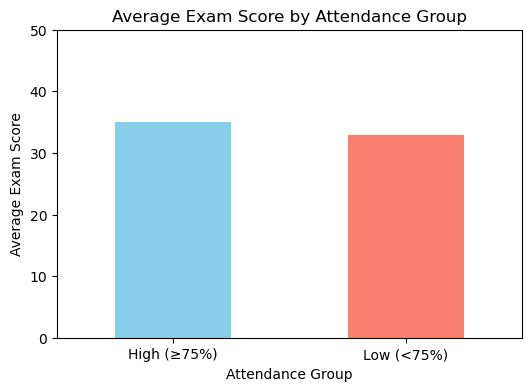

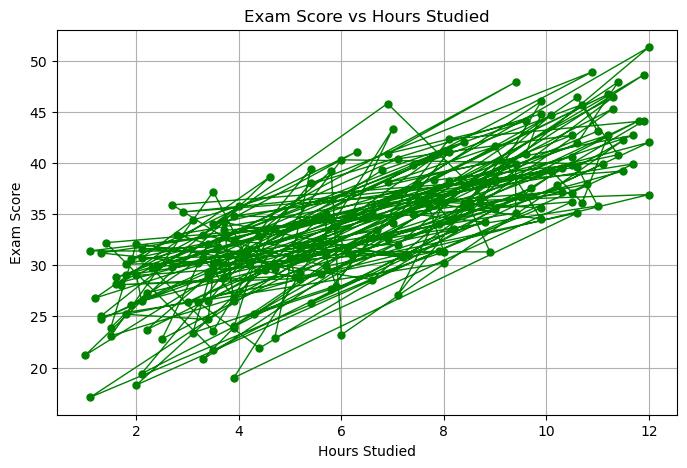

In [7]:
import matplotlib.pyplot as plt

# Bar Chart: Average Exam Score by Attendance Group
attendance_groups = df.copy()
attendance_groups['Attendance_Group'] = attendance_groups['Attendance'].apply(lambda x: 'High (≥75%)' if x >= 75 else 'Low (<75%)')
avg_score_by_attendance = attendance_groups.groupby('Attendance_Group')['Score'].mean()

plt.figure(figsize=(6,4))
avg_score_by_attendance.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Average Exam Score by Attendance Group')
plt.ylabel('Average Exam Score')
plt.xlabel('Attendance Group')
plt.ylim(0, 50)
plt.xticks(rotation=0)
plt.show()

# Line Plot: Exam Score vs Hours Studied
plt.figure(figsize=(8,5))
plt.plot(df['Hours'], df['Score'], 'o-', color='green', markersize=5, linewidth=1)
plt.title('Exam Score vs Hours Studied')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.grid(True)
plt.show()


### Insights:

Bar Chart: Students with high attendance (≥75%) score better on exams than those with lower attendance, highlighting the importance of consistent class presence.

Line Plot: There is a positive relationship between hours studied and exam scores — students who study more tend to perform better.

### 8. Visualization with Seaborn

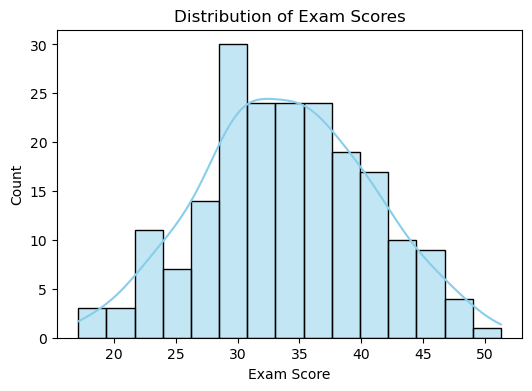

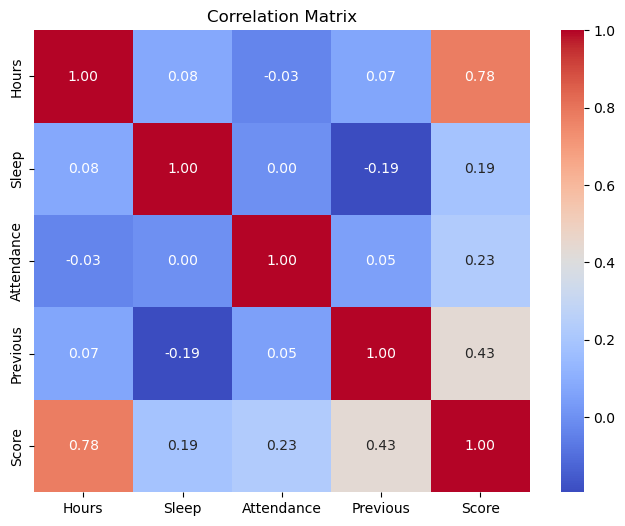

C:\Users\chund\AppData\Local\Temp\ipykernel_2884\2055718578.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attendance_Group', data=df, palette='pastel')


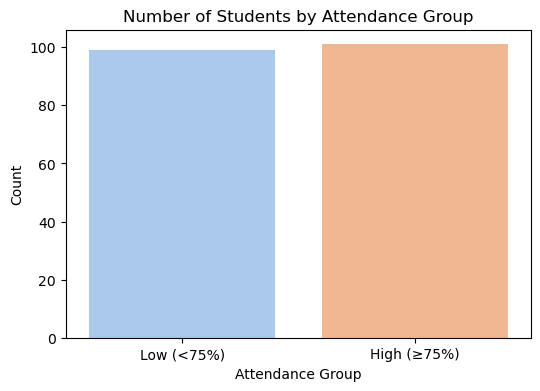

C:\Users\chund\AppData\Local\Temp\ipykernel_2884\2055718578.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attendance_Group', y='Score', data=df, palette='Set2')


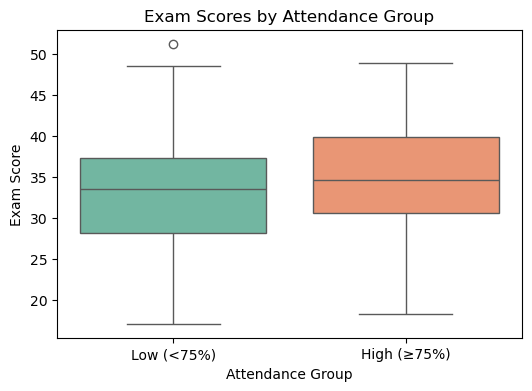

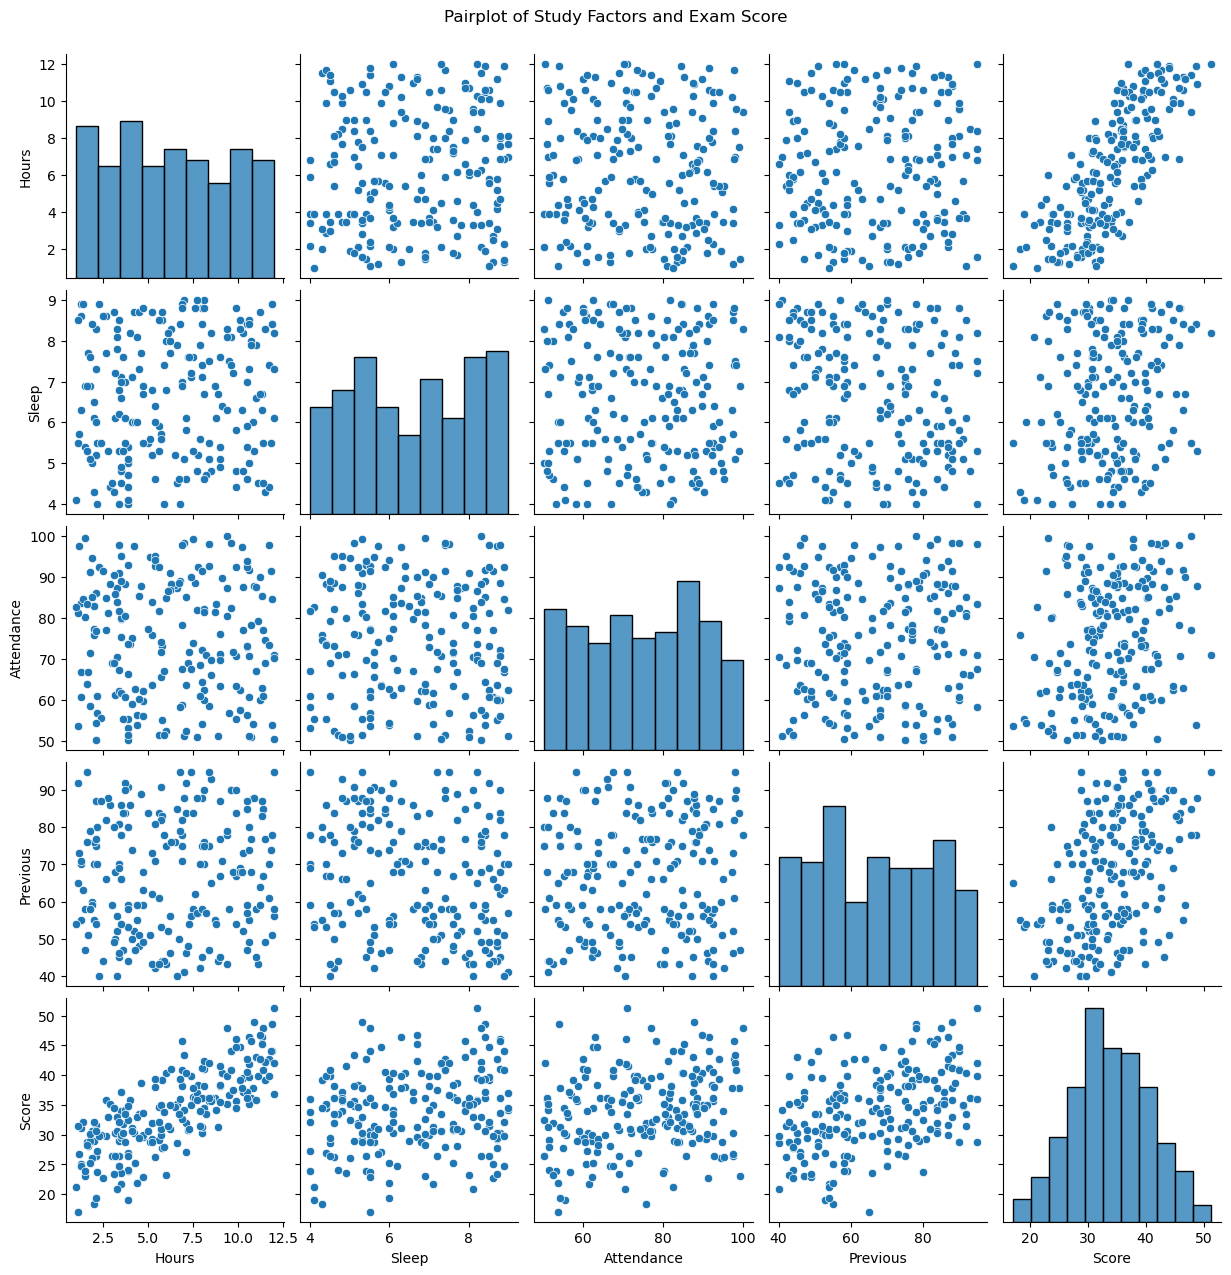

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram: Distribution of Exam Scores
plt.figure(figsize=(6,4))
sns.histplot(df['Score'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Count')
plt.show()

# Heatmap: Correlation Matrix of Numeric Features
plt.figure(figsize=(8,6))
corr = df[['Hours', 'Sleep', 'Attendance', 'Previous', 'Score']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Countplot: Attendance Group Counts (High vs Low)
df['Attendance_Group'] = df['Attendance'].apply(lambda x: 'High (≥75%)' if x >= 75 else 'Low (<75%)')
plt.figure(figsize=(6,4))
sns.countplot(x='Attendance_Group', data=df, palette='pastel')
plt.title('Number of Students by Attendance Group')
plt.xlabel('Attendance Group')
plt.ylabel('Count')
plt.show()

# Boxplot: Exam Score by Attendance Group
plt.figure(figsize=(6,4))
sns.boxplot(x='Attendance_Group', y='Score', data=df, palette='Set2')
plt.title('Exam Scores by Attendance Group')
plt.xlabel('Attendance Group')
plt.ylabel('Exam Score')
plt.show()

# Pairplot: Relationships between Numeric Variables
sns.pairplot(df[['Hours', 'Sleep', 'Attendance', 'Previous', 'Score']])
plt.suptitle('Pairplot of Study Factors and Exam Score', y=1.02)
plt.show()


### Insights:
1.Histogram

Scores mostly between 20-50, slightly right-skewed.

Peak around 30-40.

2.Heatmap

Hours studied & previous scores positively linked to exam score.

Sleep shows little correlation.

3.Countplot

Equal number of students in high and low attendance groups.

4.Boxplot

High attendance students have higher median scores.

Low attendance shows more score variation.

5.Pairplot

Hours studied and previous scores relate positively to exam scores.

Sleep has no clear pattern.